# Complete Regression - Lab

## Introduction
By now, you have created all the necessary functions to calculate the slope, intercept, best-fit line, prediction, and visualizations. In this lab you will put them all together to run a regression experiment and calculate the model loss. 

## Objectives

You will be able to:

* Perform a linear regression using self-constructed functions
* Calculate the coefficient of determination using self-constructed functions
* Use the coefficient of determination to determine model performance

## The formulas

**Slope**: 
$\hat m = \dfrac{\overline{x}*\overline{y}-\overline{xy}}{(\overline{x})^2-\overline{x^2}}$


**Intercept**: $ \hat c = \bar{y} - \hat m\bar{x}$

**Prediction**: $\hat{y} = \hat mx + \hat c$

**R-Squared**: 
$ R^2 = 1- \dfrac{SS_{RES}}{SS_{TOT}} = 1 - \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2} $


Use the Python functions created earlier to implement these formulas to run a regression analysis using x and y as input variables. 

In [1]:
def calc_slope(xs,ys):
    return (np.mean(xs) * np.mean(ys) - np.mean(xs*ys)) / (np.mean(xs)**2 - np.mean(xs**2))

In [2]:
def best_fit(xs,ys): 
    slope = calc_slope(xs, ys)
    y_intercept = np.mean(ys) - (slope*np.mean(xs))
    return slope, y_intercept

In [3]:
def reg_line (m, c, xs):
    return [(m*x) + c for x in xs]

In [4]:
def sq_err(y_real, y_predicted):  
    squared_error = np.sum((y_real - y_predicted)**2)
    return squared_error

In [5]:
def r_squared(y_real, y_predicted):    
    mean_y_real = np.mean(y_real)
    ssr = sq_err(y_real, y_predicted)
    sst = np.sum((y_real - mean_y_real)**2)
    r_squared = 1 - (ssr/sst)
    return r_squared

In [6]:
# Combine all the functions created so far to run a complete regression experiment. 
# Produce an output similar to the one shown below. 
import numpy as np
import matplotlib.pyplot as plt
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=np.float64)
Y = np.array([7, 7, 8, 9, 9, 10, 10, 11, 11, 12], dtype=np.float64)


In [7]:
calc_slope(X, Y)

0.5575757575757568

In [8]:
m, c = best_fit(X, Y)
m, c

(0.5575757575757568, 6.3333333333333375)

In [9]:
regression_line = reg_line(m, c, X)
regression_line

[6.890909090909094,
 7.448484848484851,
 8.006060606060608,
 8.563636363636364,
 9.121212121212121,
 9.67878787878788,
 10.236363636363635,
 10.793939393939393,
 11.351515151515148,
 11.909090909090907]

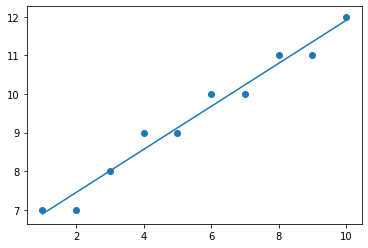

In [10]:
plt.scatter(X, Y)
plt.plot(X, regression_line)

In [11]:
r_squared1 = r_squared(Y, regression_line)
r_squared1

0.9715335169880626

In [12]:
# Basic Regression Diagnostics
# ----------------------------
# Slope: 0.56
# Y-Intercept: 6.33
# R-Squared: 0.97
# ----------------------------
# Model: Y = 0.56 * X + 6.33

## Make Predictions

Predict and plot the value of y using regression line above for a new value of $x = 4.5$.

In [13]:
x_new = 4.5
y_predicted = (m*x_new) + c
y_predicted

8.842424242424244

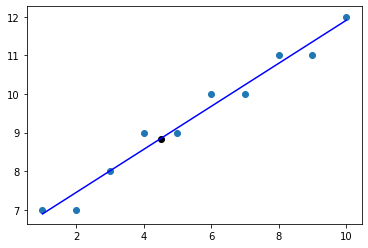

In [14]:
plt.scatter(X, Y)
plt.plot(X, regression_line, color='blue')
plt.scatter(x_new, y_predicted, color='k')

In [15]:
import pandas as pd
df = pd.read_csv('heightweight.csv')
df.head()

,height,weight
0,68,165
1,71,201
2,61,140
3,69,170
4,71,192


In [16]:
new_x = df['height'].to_numpy(dtype=np.float64)
new_y = df['weight'].to_numpy(dtype=np.float64)

In [17]:
calc_slope(new_x, new_y)

5.539019232705614

In [18]:
m2, c2 = best_fit(new_x, new_y)
m2, c2

(5.539019232705614, -204.48343570637024)

In [19]:
regression_line2 = reg_line(m2, c2, new_x)
regression_line2

[172.16987211761148,
 188.78692981572834,
 133.39673748867216,
 177.70889135031712,
 188.78692981572834,
 116.77967979055535,
 194.32594904843393,
 199.86496828113957,
 116.77967979055535,
 205.40398751384515,
 133.39673748867216,
 122.31869902326093,
 177.70889135031712,
 172.16987211761148,
 150.01379518678903,
 177.70889135031712,
 194.32594904843393,
 161.09183365220025,
 155.55281441949467,
 177.70889135031712]

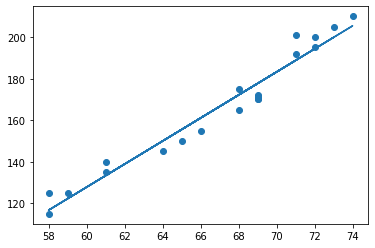

In [20]:
plt.scatter(new_x, new_y)
plt.plot(new_x, regression_line2)

In [21]:
x2_new = 70
y2_predicted = (m2*x2_new) + c2
y2_predicted

183.2479105830227

Text(0, 0.5, 'Weight')

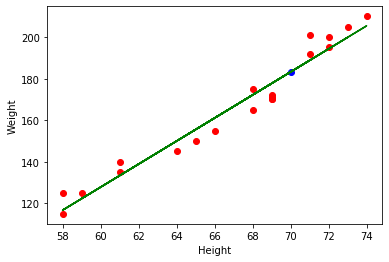

In [22]:
plt.scatter(new_x, new_y, color='red')
plt.plot(new_x, regression_line2, color='green')
plt.scatter(x2_new, y2_predicted, color='blue')
plt.xlabel('Height')
plt.ylabel('Weight')

In [23]:
r_squared2 = r_squared(new_y, regression_line2)
r_squared2

0.9553099288673668

## Level up - Optional 
Load the "`heightweight.csv`" dataset. Use the height as an independent and weight as a dependent variable and draw a regression line to data using your code above. Calculate your R-Squared value for the model and try to predict new values of y. 

## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next up, you'll learn how you can use Python's built-in modules to perform similar analyses with a much higher level of sophistication. 